# Upravenie dát a spracovanie textu

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Analýza a upravenie datasetu

In [3]:
# Pravdivé články
filename_true = "../data/True.csv"
df_true = pd.read_csv(filename_true)
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
df_true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

<AxesSubplot:>

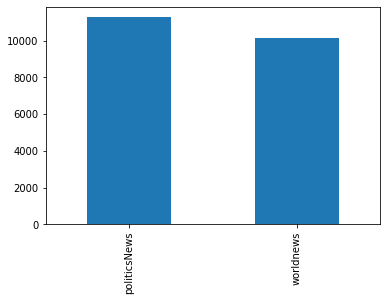

In [6]:
df_true['subject'].value_counts().sort_index().plot.bar()

In [7]:
# Zistenie a vytvorenie stĺpca dĺžok obsahov
df_true['text_length'] = df_true.text.str.split().str.len()
df_true

,title,text,subject,date,text_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",749
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",457
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",376
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",852
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",466
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",125
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",320
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",205


In [8]:
df_true['text_length'].max()

5172

<AxesSubplot:xlabel='text_length'>

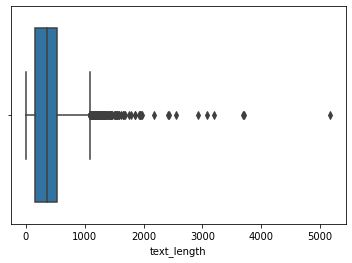

In [9]:
sns.boxplot(data=df_true, x="text_length")

In [10]:
# Zistenie najpoužívanejších slov v obsahoch pravdivých článkov
text_lower = df_true['text'].str.lower().str.cat()
text_lower = re.sub('[^A-Za-z]', ' ', text_lower)
text_tokenize = nltk.word_tokenize(text_lower)
text_dist = nltk.FreqDist(text_tokenize)
result = pd.DataFrame(text_dist.most_common(20), columns=['Words', 'Count'])
print(result)

    Words   Count
0     the  482469
1      to  245734
2      of  205277
3       a  198664
4     and  182081
5      in  181652
6       s  142720
7      on  108598
8    said   99062
9    that   88237
10    for   79897
11     is   55494
12  trump   54702
13   with   54504
14     he   54371
15     it   49592
16     by   47949
17    was   47946
18     as   47333
19    has   46246


In [11]:
# Zistenie najpoužívanejších slov v názvoch pravdivých článkov
title_lower = df_true['title'].str.lower().str.cat()
title_lower = re.sub('[^A-Za-z]', ' ', title_lower)
title_tokenize = nltk.word_tokenize(title_lower)
title_dist = nltk.FreqDist(title_tokenize)
result = pd.DataFrame(title_dist.most_common(20), columns=['Words', 'Count'])
print(result)

    Words  Count
0       s   8386
1      to   7817
2      in   4504
3      on   3313
4   trump   3047
5      of   3013
6       u   2954
7    says   2785
8     for   2751
9    with   1471
10     as   1033
11   over    999
12  after    946
13  house    907
14     at    836
15    not    827
16  north    798
17  korea    761
18   from    743
19    new    714


In [12]:
# Nepravdivé články
filename_fake = "../data/Fake.csv"
df_fake = pd.read_csv(filename_fake)
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [13]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [14]:
df_fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

<AxesSubplot:>

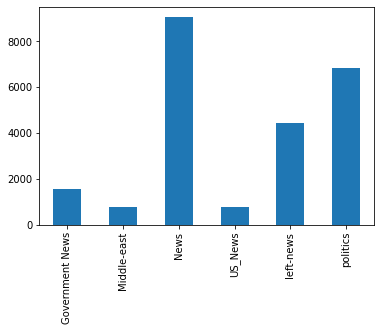

In [15]:
df_fake['subject'].value_counts().sort_index().plot.bar()

In [16]:
title_lower = df_fake['title'].str.lower().str.cat()
title_lower = re.sub('[^A-Za-z]', ' ', title_lower)
title_tokenize = nltk.word_tokenize(title_lower)
title_dist = nltk.FreqDist(title_tokenize)
result = pd.DataFrame(title_dist.most_common(20), columns=['Words', 'Count'])
print(result)

      Words  Count
0        to   9510
1     trump   9079
2     video   8439
3         s   7715
4       the   6178
5        of   5168
6       for   4829
7        in   4709
8         a   3754
9        on   3682
10      and   3665
11       is   2802
12     with   2475
13    obama   2378
14  hillary   2154
15        t   1758
16    about   1693
17    watch   1645
18      his   1643
19       it   1610


In [17]:
df_fake['text_length'] = df_fake.text.str.split().str.len()
df_fake

,title,text,subject,date,text_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",495
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",305
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",580
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",444
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",420
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",522
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",297
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",4171
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",456


In [18]:
text_lower = df_fake['text'].str.lower().str.cat()
text_lower = re.sub('[^A-Za-z]', ' ', text_lower)
text_tokenize = nltk.word_tokenize(text_lower)
text_dist = nltk.FreqDist(text_tokenize)
result = pd.DataFrame(text_dist.most_common(20), columns=['Words', 'Count'])
print(result)

    Words   Count
0     the  543447
1      to  290868
2      of  236721
3     and  227349
4       a  214827
5      in  171205
6    that  151786
7       s  142560
8      is  111237
9     for   93453
10     on   83409
11     it   83205
12  trump   79761
13     he   79111
14    was   67858
15   with   63364
16    his   58374
17   this   58197
18     as   57711
19     be   49282


In [19]:
# Priradenie označenia k článkom
df_true['label'] = 'true'
df_true

,title,text,subject,date,text_length,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",749,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",624,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",457,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",376,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",852,true
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",466,true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",125,true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",320,true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",205,true


In [20]:
df_fake['label'] = 'fake'
df_fake

,title,text,subject,date,text_length,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",495,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",305,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",580,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",444,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",420,fake
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",522,fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",297,fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",4171,fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",456,fake


In [21]:
# Spojenie pravdivých a nepravdivých článkov
df_fake_true = pd.concat([df_true, df_fake], ignore_index = True)
df_fake_true

,title,text,subject,date,text_length,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",749,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",624,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",457,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",376,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",852,true
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",522,fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",297,fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",4171,fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",456,fake


In [22]:
# Odstránenie NaN hodnôt z dát
df_fake_true.dropna(inplace=True)

In [23]:
# Odstránenie stĺpca date a prázdnych článkov
df_fake_true = df_fake_true.drop(columns=['date'])
df_fake_true = df_fake_true[df_fake_true.text_length != 0]

In [24]:
df_fake_true.duplicated().sum()

213

In [25]:
# Odstránenie duplikovaných článkov
df_fake_true.drop_duplicates(inplace=True, ignore_index=True)
df_fake_true.duplicated().sum()

0

<AxesSubplot:xlabel='text_length'>

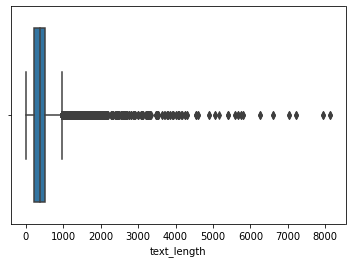

In [26]:
sns.boxplot(data=df_fake_true, x="text_length")

In [27]:
df_fake_true['text_length'].describe()

count    44054.000000
mean       410.744995
std        350.693074
min          1.000000
25%        212.000000
50%        365.000000
75%        515.000000
max       8135.000000
Name: text_length, dtype: float64

<AxesSubplot:xlabel='title_length'>

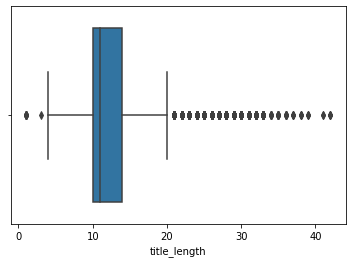

In [28]:
df_fake_true['title_length'] = df_fake_true.title.str.split().str.len()
sns.boxplot(data=df_fake_true, x="title_length")

In [29]:
df_fake_true['title_length'].describe()

count    44054.000000
mean        12.431697
std          4.103323
min          1.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title_length, dtype: float64

<AxesSubplot:xlabel='label', ylabel='Count'>

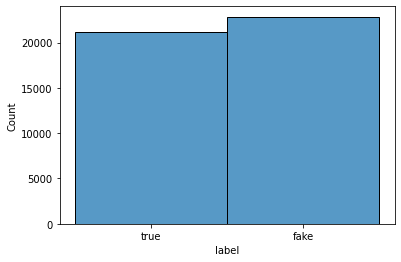

In [30]:
sns.histplot(df_fake_true['label'])

In [31]:
df_fake_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44054 entries, 0 to 44053
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44054 non-null  object
 1   text          44054 non-null  object
 2   subject       44054 non-null  object
 3   text_length   44054 non-null  int64 
 4   label         44054 non-null  object
 5   title_length  44054 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


## Spracovanie textu

In [32]:
# Tokenizácia, transformácia veľkých písmen na malé, odstránenie nadbytočných znakov, stopslov a aplikácia stemmingu na názvy
df_fake_true['title_stem'] = df_fake_true['title'].str.lower().str.replace('\W', ' ').str.split()
stop_words = stopwords.words('english')
stop_words.append('u')
df_fake_true['title_stem'] = df_fake_true['title_stem'].apply(lambda x: [item for item in x if item not in stop_words])
stemmer = nltk.stem.SnowballStemmer('english')
df_fake_true['title_stem'] = df_fake_true['title_stem'].apply(lambda x: [stemmer.stem(y) for y in x])
df_fake_true['title_stem'] = df_fake_true['title_stem'].str.join(" ")
df_fake_true['title_stem']

0          budget fight loom republican flip fiscal script
1        militari accept transgend recruit monday pentagon
2               senior republican senat let mr mueller job
3        fbi russia probe help australian diplomat tip nyt
4        trump want postal servic charg much amazon shi...
                               ...                        
44049    mcpain john mccain furious iran treat us sailo...
44050    justic yahoo settl e mail privaci class action...
44051    sunnistan us alli safe zone plan take territor...
44052    blow 700 million al jazeera america final call...
44053    10 navi sailor held iranian militari sign neoc...
Name: title_stem, Length: 44054, dtype: object

In [33]:
# Funkcia pre priradenie POS na ďalšie použitie pri lemmatizácii
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [34]:
# Tokenizácia, transformácia veľkých písmen na malé, odstránenie nadbytočných znakov, stopslov a aplikácia lemmatizácie na názvy
df_fake_true['title_lemm'] = df_fake_true['title'].str.lower().str.replace('\W', ' ').str.split()
stop_words = stopwords.words('english')
stop_words.append('u')
df_fake_true['title_lemm'] = df_fake_true['title_lemm'].apply(lambda x: [item for item in x if item not in stop_words])
lemmatizer = WordNetLemmatizer()
df_fake_true['title_lemm'] = df_fake_true['title_lemm'].apply(lambda x: [lemmatizer.lemmatize(y, get_pos(y)) for y in x])
df_fake_true['title_lemm'] = df_fake_true['title_lemm'].str.join(" ")
df_fake_true['title_lemm']

0          budget fight loom republican flip fiscal script
1        military accept transgender recruit monday pen...
2             senior republican senator let mr mueller job
3        fbi russia probe help australian diplomat tip nyt
4        trump want postal service charge much amazon s...
                               ...                        
44049    mcpain john mccain furious iran treat u sailor...
44050    justice yahoo settle e mail privacy class acti...
44051    sunnistan u allied safe zone plan take territo...
44052    blow 700 million al jazeera america finally ca...
44053    10 navy sailor held iranian military sign neoc...
Name: title_lemm, Length: 44054, dtype: object

In [35]:
# Funkcia pre nahradenie podstatného mena jeho hyperonymom - ak neexistuje, je ponechané originálne podstatné meno
def hypernyms(word):
    try:
        syn = wordnet.synsets(word)[0]
        hypernym = syn.hypernyms()[0].name()[:-5]
        pos = nltk.pos_tag([word])
        if pos[0][1][0].upper() == 'N':
            return hypernym
    except:
        return word
    
    return word

In [36]:
# Tokenizácia, transformácia veľkých písmen na malé, odstránenie nadbytočných znakov, stopslov a aplikácia hyperonýmie na názvy
df_fake_true['title_hypernym'] = df_fake_true['title'].str.lower().str.replace('\W+', ' ').str.split()
stop_words = stopwords.words('english')
stop_words.append('u')
df_fake_true['title_hypernym'] = df_fake_true['title_hypernym'].apply(lambda x: [item for item in x if item not in stop_words])
df_fake_true['title_hypernym'] = df_fake_true['title_hypernym'].apply(lambda x: [hypernyms(y) for y in x])
df_fake_true['title_hypernym'] = df_fake_true['title_hypernym'].str.join(" ").str.replace('_', ' ')
df_fake_true['title_hypernym']

0        fund military action textile machine politicia...
1        military evaluate transgender enlisted man wee...
2        senior republican legislator let title mueller...
3        law enforcement agency russia inquiry helped a...
4        playing card wants postal work attack much wom...
                               ...                        
44049    mcpain room mccain furious iran treated us ski...
44050    natural virtue rustic bench antioxidant messag...
44051    sunnistan us allied safe topographic point ide...
44052    stroke 700 million metallic element jazeera am...
44053    10 military service skilled worker held irania...
Name: title_hypernym, Length: 44054, dtype: object

In [37]:
# Rovnaký postup na obsahy článkov
df_fake_true['text_stem'] = df_fake_true['text'].str.lower().str.replace('\W', ' ').str.split()
stop_words = stopwords.words('english')
stop_words.append('u')
df_fake_true['text_stem'] = df_fake_true['text_stem'].apply(lambda x: [item for item in x if item not in stop_words])
stemmer = nltk.stem.SnowballStemmer('english')
df_fake_true['text_stem'] = df_fake_true['text_stem'].apply(lambda x: [stemmer.stem(y) for y in x])
df_fake_true['text_stem'] = df_fake_true['text_stem'].str.join(" ")
df_fake_true['text_stem']

0        washington reuter head conserv republican fact...
1        washington reuter transgend peopl allow first ...
2        washington reuter special counsel investig lin...
3        washington reuter trump campaign advis georg p...
4        seattl washington reuter presid donald trump c...
                               ...                        
44049    21st centuri wire say 21wire report earlier we...
44050    21st centuri wire say familiar theme whenev di...
44051    patrick henningsen 21st centuri wirerememb oba...
44052    21st centuri wire say al jazeera america go hi...
44053    21st centuri wire say 21wire predict new year ...
Name: text_stem, Length: 44054, dtype: object

In [38]:
df_fake_true['text_lemm'] = df_fake_true['text'].str.lower().str.replace('\W', ' ').str.split()
stop_words = stopwords.words('english')
stop_words.append('u')
df_fake_true['text_lemm'] = df_fake_true['text_lemm'].apply(lambda x: [item for item in x if item not in stop_words])
lemmatizer = WordNetLemmatizer()
df_fake_true['text_lemm'] = df_fake_true['text_lemm'].apply(lambda x: [lemmatizer.lemmatize(y, get_pos(y)) for y in x])
df_fake_true['text_lemm'] = df_fake_true['text_lemm'].str.join(" ")
df_fake_true['text_lemm']

0        washington reuters head conservative republica...
1        washington reuters transgender people allow fi...
2        washington reuters special counsel investigati...
3        washington reuters trump campaign adviser geor...
4        seattle washington reuters president donald tr...
                               ...                        
44049    21st century wire say 21wire report earlier we...
44050    21st century wire say familiar theme whenever ...
44051    patrick henningsen 21st century wireremember o...
44052    21st century wire say al jazeera america go hi...
44053    21st century wire say 21wire predict new year ...
Name: text_lemm, Length: 44054, dtype: object

In [39]:
df_fake_true['text_hypernym'] = df_fake_true['text'].str.lower().str.replace('\W+', ' ').str.split()
stop_words = stopwords.words('english')
stop_words.append('u')
df_fake_true['text_hypernym'] = df_fake_true['text_hypernym'].apply(lambda x: [item for item in x if item not in stop_words])
df_fake_true['text_hypernym'] = df_fake_true['text_hypernym'].apply(lambda x: [hypernyms(y) for y in x])
df_fake_true['text_hypernym'] = df_fake_true['text_hypernym'].str.join(" ").str.replace('_', ' ')
df_fake_true['text_hypernym']

0        washington reuters external body part conserva...
1        washington reuters transgender group allowed f...
2        washington reuters special lawyer inquiry golf...
3        washington reuters playing card race authority...
4        seattle washington reuters corporate executive...
                               ...                        
44049    21st time period ligament says 21wire reported...
44050    21st time period ligament says familiar messag...
44051    patrick henningsen 21st time period wirerememb...
44052    21st time period ligament says metallic elemen...
44053    21st time period ligament says 21wire predicte...
Name: text_hypernym, Length: 44054, dtype: object

In [40]:
# Spojenie názvov a obsahov článkov
df_fake_true["title_text"] = df_fake_true["title"] + " " + df_fake_true["text"]
df_fake_true["title_text_stem"] = df_fake_true["title_stem"] + " " + df_fake_true["text_stem"]
df_fake_true["title_text_lemm"] = df_fake_true["title_lemm"] + " " + df_fake_true["text_lemm"]
df_fake_true["title_text_hypernym"] = df_fake_true["title_hypernym"] + " " + df_fake_true["text_hypernym"]
df_fake_true

,title,text,subject,text_length,label,title_length,title_stem,title_lemm,title_hypernym,text_stem,text_lemm,text_hypernym,title_text,title_text_stem,title_text_lemm,title_text_hypernym
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,749,true,10,budget fight loom republican flip fiscal script,budget fight loom republican flip fiscal script,fund military action textile machine politicia...,washington reuter head conserv republican fact...,washington reuters head conservative republica...,washington reuters external body part conserva...,"As U.S. budget fight looms, Republicans flip t...",budget fight loom republican flip fiscal scrip...,budget fight loom republican flip fiscal scrip...,fund military action textile machine politicia...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,624,true,9,militari accept transgend recruit monday pentagon,military accept transgender recruit monday pen...,military evaluate transgender enlisted man wee...,washington reuter transgend peopl allow first ...,washington reuters transgender people allow fi...,washington reuters transgender group allowed f...,U.S. military to accept transgender recruits o...,militari accept transgend recruit monday penta...,military accept transgender recruit monday pen...,military evaluate transgender enlisted man wee...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,457,true,10,senior republican senat let mr mueller job,senior republican senator let mr mueller job,senior republican legislator let title mueller...,washington reuter special counsel investig lin...,washington reuters special counsel investigati...,washington reuters special lawyer inquiry golf...,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senat let mr mueller job was...,senior republican senator let mr mueller job w...,senior republican legislator let title mueller...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,376,true,9,fbi russia probe help australian diplomat tip nyt,fbi russia probe help australian diplomat tip nyt,law enforcement agency russia inquiry helped a...,washington reuter trump campaign advis georg p...,washington reuters trump campaign adviser geor...,washington reuters playing card race authority...,FBI Russia probe helped by Australian diplomat...,fbi russia probe help australian diplomat tip ...,fbi russia probe help australian diplomat tip ...,law enforcement agency russia inquiry helped a...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,852,true,11,trump want postal servic charg much amazon shi...,trump want postal service charge much amazon s...,playing card wants postal work attack much wom...,seattl washington reuter presid donald trump c...,seattle washington reuters president donald tr...,seattle washington reuters corporate executive...,Trump wants Postal Service to charge 'much mor...,trump want postal servic charg much amazon shi...,trump want postal service charge much amazon s...,playing card wants postal work attack much wom...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44049,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,522,fake,10,mcpain john mccain furious iran treat us sailo...,mcpain john mccain furious iran treat u sailor...,mcpain room mccain furious iran treated us ski...,21st centuri wire say 21wire report earlier we...,21st century wire say 21wire report earlier we...,21st time period ligament says 21wire reported...,McPain: John McCain Furious That Iran Treated ...,mcpain john mccain furious iran treat us sailo...,mcpain john mccain furious iran treat u sailor...,mcpain room mccain furious iran treated us ski

In [41]:
# Uloženie spracovaných dát
df_fake_true.to_csv("finalne_data.csv", index=False)